In [55]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [40]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [41]:
X_train_full = X_train_full.reshape(X_train_full.shape[0],
                                   X_train_full.shape[1] * X_train_full.shape[2])

In [43]:
X_test = X_test.reshape(X_test.shape[0],
                        X_test.shape[1] * X_test.shape[2])

In [44]:
X_train_full.shape, X_test.shape

((60000, 784), (10000, 784))

In [45]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255

In [46]:
X_valid.shape, X_train.shape

((5000, 784), (55000, 784))

In [47]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [48]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_dim= 28*28, 
                             activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [50]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['acc'])

In [51]:
model.build(input_shape=[28, 28])

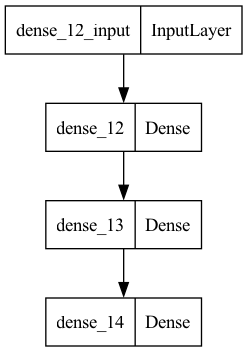

In [52]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 851us/step - loss: 0.7063 - acc: 0.7662 - val_loss: 0.5061 - val_acc: 0.8320
Epoch 2/30
1719/1719 [==============================] - 1s 798us/step - loss: 0.4858 - acc: 0.8305 - val_loss: 0.4509 - val_acc: 0.8466
Epoch 3/30
1719/1719 [==============================] - 1s 789us/step - loss: 0.4418 - acc: 0.8454 - val_loss: 0.4310 - val_acc: 0.8472
Epoch 4/30
1719/1719 [==============================] - 1s 788us/step - loss: 0.4151 - acc: 0.8542 - val_loss: 0.3969 - val_acc: 0.8614
Epoch 5/30
1719/1719 [==============================] - 1s 800us/step - loss: 0.3945 - acc: 0.8607 - val_loss: 0.4097 - val_acc: 0.8602
Epoch 6/30
1719/1719 [==============================] - 1s 790us/step - loss: 0.3787 - acc: 0.8667 - val_loss: 0.3988 - val_acc: 0.8536
Epoch 7/30
1719/1719 [==============================] - 1s 791us/step - loss: 0.3641 - acc: 0.8717 - val_loss: 0.3610 - val_acc: 0.8722
Epoch 8/30
1719/1719 [==========================

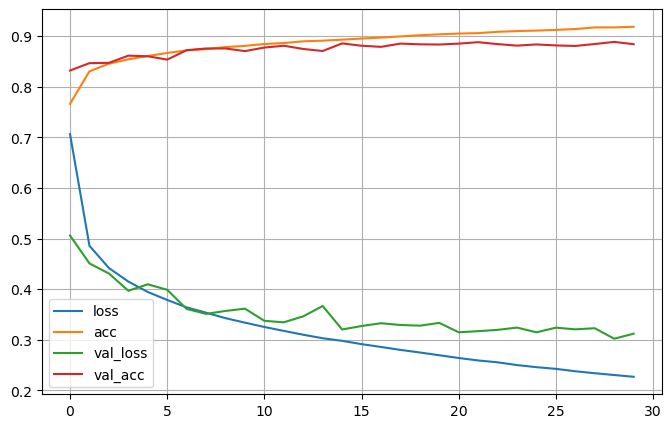

In [57]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim();

In [58]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 504us/step - loss: 61.8474 - acc: 0.8544


[61.8474006652832, 0.8543999791145325]

In [59]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 51ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 0s 489us/step


In [63]:
classes_x

array([9, 2, 1, ..., 8, 1, 5])